# Coursera - Practical Machine Learning Project
### by Ramesh NBN

## Introduction and Background

Using devices such as Jawbone Up, Nike FuelBand, and Fitbit it is now possible to collect a large amount of data about personal activity relatively inexpensively. These type of devices are part of the quantified self movement – a group of enthusiasts who take measurements about themselves regularly to improve their health, to find patterns in their behavior, or because they are tech geeks. One thing that people regularly do is quantify how much of a particular activity they do, but they rarely quantify how well they do it. In this project, your goal will be to use data from accelerometers on the belt, forearm, arm, and dumbell of 6 participants. They were asked to perform barbell lifts correctly and incorrectly in 5 different ways. More information is available from the website here: http://web.archive.org/web/20161224072740/http:/groupware.les.inf.puc-rio.br/har (see the section on the Weight Lifting Exercise Dataset).

I would like to try different models such as **"Classification Trees", "Random Forest", "Gradient Boosting"** and evaluate the best model to find the predicted classification values on the test data.

## Install and load required packages

In [1]:
#install.packages("e1071")
#install.packages("rattle")
#install.packages("gbm")

In [2]:
library(caret)
library(rattle)

Loading required package: lattice
Loading required package: ggplot2
Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


# load the downloaded data from
#### https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv and https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv

In [3]:
trainingData = read.csv("pml-training.csv",na.strings=c("NA",""))

testingData = read.csv("pml-testing.csv",na.strings=c("NA",""))

#### A quick look of the training data

In [4]:
head(trainingData)

X,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,⋯,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
<int>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,⋯,0.03,0.00,-0.02,192,203,-215,-17,654,476,A
2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,⋯,0.02,0.00,-0.02,192,203,-216,-18,661,473,A
3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,⋯,0.03,-0.02,0.00,196,204,-213,-18,658,469,A
4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,⋯,0.02,-0.02,0.00,189,206,-214,-16,658,469,A
5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,⋯,0.02,0.00,-0.02,189,206,-214,-17,655,473,A
6,carlitos,1323084232,304277,05/12/2011 11:23,no,12,1.45,8.06,-94.4,⋯,0.02,-0.02,-0.03,193,203,-215,-9,660,478,A


#### Summary of the data is too large

In [5]:
#summary(trainingData)

In [6]:
#names(trainingData)

## Data cleansing

#### To find the columns having NA

In [7]:
#colSums(is.na(trainingData)==0)

#### Remove the columns which contain NA

In [8]:
training <- trainingData[, colSums(is.na(trainingData)) == 0]
testing <- testingData[, colSums(is.na(testingData)) == 0]

#### Remove first 7 columns as they do not participate in the classification of the data

In [9]:
trainData <- training[, -c(1:7)]
testData <- testing[, -c(1:7)]

## Split the train data into train and validation sets

In [10]:
set.seed(3328) 

#Divide the train data into 70,30 train and validation sets
inTrain <- createDataPartition(trainData$classe, p = 0.7, list = FALSE)

train <- trainData[inTrain, ]
valid <- trainData[-inTrain, ]

## Build the training control set using 3 fold cross validation sets

In [11]:
control <- trainControl(method = "cv", number = 3)

## Train using Classification Tree model with recursive partitioning method

#### Build the model and have a quick look of the model

In [12]:
fit_rpart <- train(classe ~ ., data = train, method = "rpart", trControl = control)

print(fit_rpart, digits = 4)

CART 

13737 samples
   52 predictor
    5 classes: 'A', 'B', 'C', 'D', 'E' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 9158, 9158, 9158 
Resampling results across tuning parameters:

  cp       Accuracy  Kappa  
  0.03357  0.5016    0.34952
  0.05954  0.4074    0.19498
  0.11616  0.3118    0.04198

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.03357.


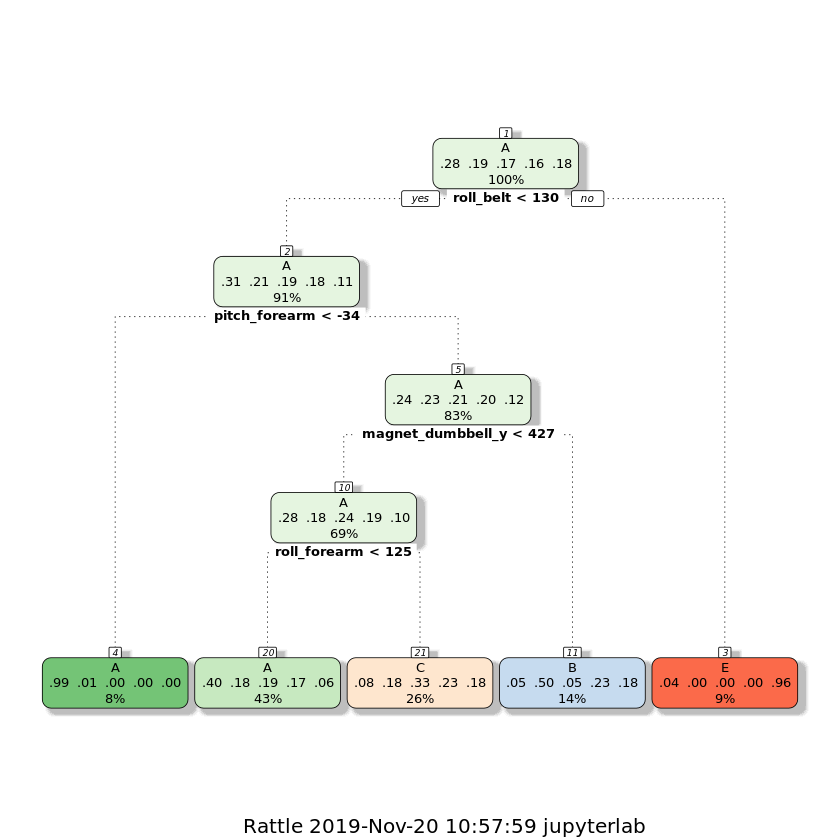

In [13]:
fancyRpartPlot(fit_rpart$finalModel)

#### Predict and validate using the validation set

In [14]:
predict_rpart <- predict(fit_rpart, valid)

cfm_rpart <- confusionMatrix(valid$classe, predict_rpart)

In [15]:
cfm_rpart$table

          Reference
Prediction    A    B    C    D    E
         A 1500   37  111    0   26
         B  460  418  261    0    0
         C  460   41  525    0    0
         D  418  191  355    0    0
         E  137  151  285    0  509

In [17]:
#Accuracy of the prediction
cfm_rpart$overall[1]

Accuracy 
0.5016143

The accuracy of this model is not good. Hence let's try our next model using Random Forest

## Train using Random Forest classification model

#### Build the model and have a quick look

In [18]:
fit_rf <- train(classe ~ ., data = train, method = "rf", trControl = control)

print(fit_rf)

Random Forest 

13737 samples
   52 predictor
    5 classes: 'A', 'B', 'C', 'D', 'E' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 9157, 9160, 9157 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9879886  0.9848048
  27    0.9889347  0.9860021
  52    0.9836928  0.9793724

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 27.


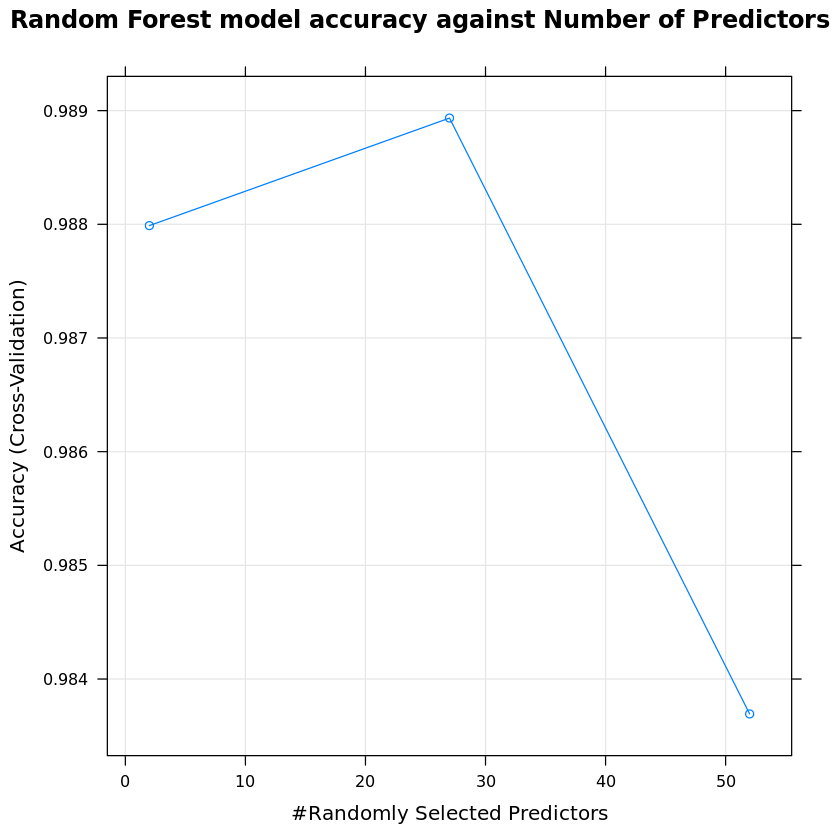

In [19]:
plot(fit_rf, main="Random Forest model accuracy against Number of Predictors")

In [20]:
predict_rf <- predict(fit_rf,valid)

In [21]:
cfm_rf <- confusionMatrix(valid$classe, predict_rf)

In [22]:
cfm_rf$table

          Reference
Prediction    A    B    C    D    E
         A 1671    2    0    0    1
         B    9 1127    3    0    0
         C    0    2 1023    1    0
         D    0    0    8  956    0
         E    0    0    1    2 1079

In [23]:
cfm_rf$overall[1]

Accuracy 
0.9950722

The accuracy of this model is very good and giving the confidence level above 99 using 3 fold cross validation sets. Let's have very close look of the model. Though this model seems to be much promising, we will try Gradient Boosting model and evaluate that too.

In [24]:
names(fit_rf$finalModel)

[1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "xNames"          "problemType"    
[21] "tuneValue"       "obsLevels"       "param"

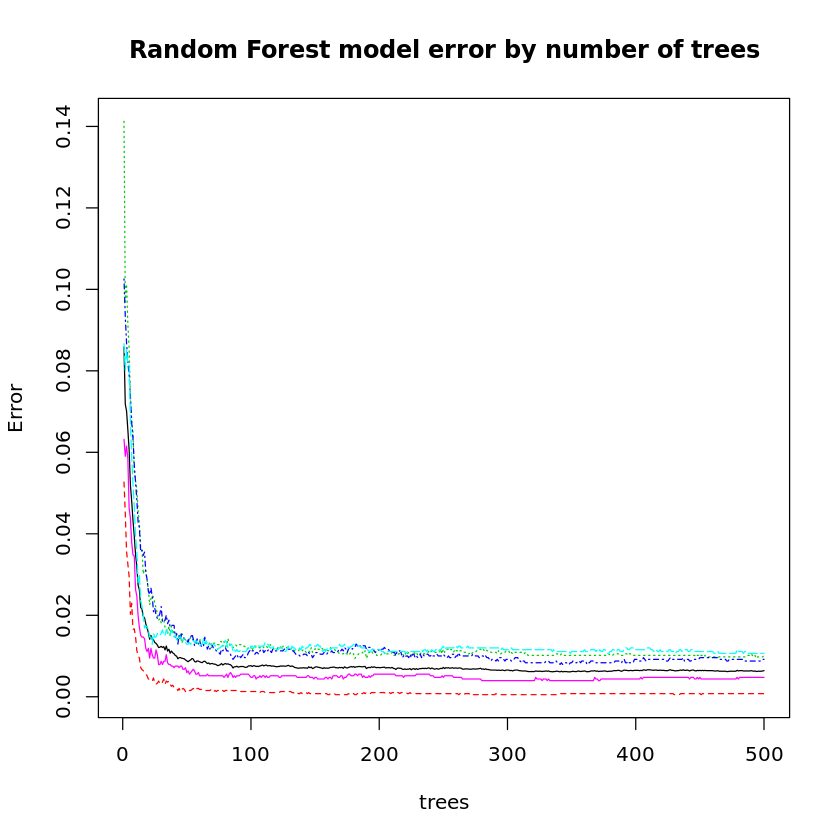

In [25]:
plot(fit_rf$finalModel,main="Random Forest model error by number of trees")

In [26]:
#Important variables used in building the model
varImp(fit_rf)

rf variable importance

  only 20 most important variables shown (out of 52)

                     Overall
roll_belt             100.00
pitch_forearm          61.89
yaw_belt               55.80
magnet_dumbbell_z      46.11
pitch_belt             45.27
magnet_dumbbell_y      41.96
roll_forearm           38.65
accel_dumbbell_y       20.94
roll_dumbbell          19.11
magnet_dumbbell_x      18.49
accel_forearm_x        16.64
magnet_belt_z          15.01
total_accel_dumbbell   14.99
accel_belt_z           14.42
accel_dumbbell_z       14.17
magnet_belt_y          13.69
magnet_forearm_z       13.35
yaw_arm                11.25
gyros_belt_z           11.23
magnet_belt_x          10.21

## Train the model using Gradient Boosting method

In [27]:
fit_gbm <- train(classe ~ ., data = train, method = "gbm", trControl = control)

print(fit_gbm)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.6094            -nan     0.1000    0.1312
     2        1.5208            -nan     0.1000    0.0882
     3        1.4619            -nan     0.1000    0.0655
     4        1.4170            -nan     0.1000    0.0554
     5        1.3806            -nan     0.1000    0.0442
     6        1.3517            -nan     0.1000    0.0434
     7        1.3235            -nan     0.1000    0.0426
     8        1.2970            -nan     0.1000    0.0335
     9        1.2758            -nan     0.1000    0.0303
    10        1.2559            -nan     0.1000    0.0236
    20        1.1012            -nan     0.1000    0.0177
    40        0.9302            -nan     0.1000    0.0107
    60        0.8226            -nan     0.1000    0.0065
    80        0.7424            -nan     0.1000    0.0041
   100        0.6797            -nan     0.1000    0.0023
   120        0.6278            -nan     0.1000    0.0022
   140        

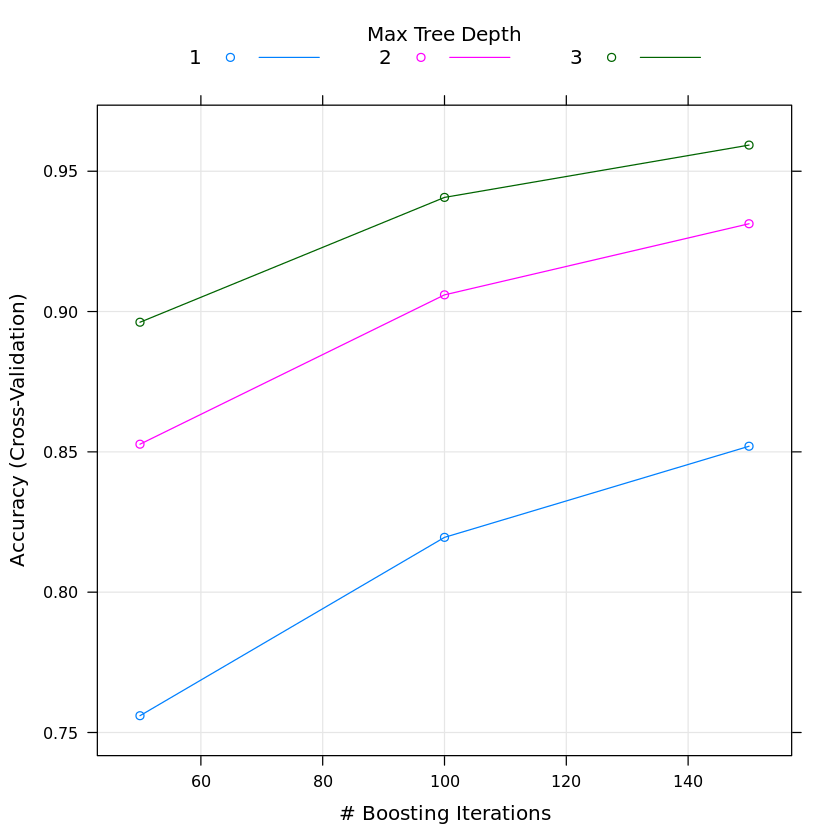

In [28]:
plot(fit_gbm)

In [29]:
predict_gbm <- predict(fit_gbm,valid)

In [30]:
cfm_gbm <- confusionMatrix(valid$classe, predict_gbm)

In [31]:
cfm_gbm$table

          Reference
Prediction    A    B    C    D    E
         A 1648   18    5    3    0
         B   30 1081   27    0    1
         C    0   33  975   14    4
         D    0    5   32  921    6
         E    2   20   14   12 1034

In [32]:
cfm_gbm$overall[1]

Accuracy 
0.9615973

The accuracy of this model with 96.15% is better than Classification Trees but not with Random forest. Hence, we conclude that Random forest is the best for this experiment.

## Conclusion

From the above 3 models, Random forest is much more promising. Hence using the Random Forest model to predict the values on the test set

In [33]:
results <- predict(fit_rf, testData)
results

[1] B A B A A E D B A A B C B A E E A B B B
Levels: A B C D E